# EDA：視覺化更多圖表的技巧（作業說明欄請勿調成編輯模式，以防下方示意圖片無法使用）

## 作業程式碼
本作業將請學員完成以下要求：
1. 請至 Kaggle 平台找尋欲探索的資料集，進行本次作業。
2. 請參考圖一的 2 x 3 子圖配置，分別使用 plt.subplot、plt.subplots() 與 plt.add_subplot() 完成視覺化
3. 請參考圖二的不規則子圖配置以及相對應的圖表種類，利用 plt.GridSpec() 完成視覺化。

<center>

![](%E5%9C%96%E7%89%871.png) 

圖一   
![](%E5%9C%96%E7%89%872.png) 

圖二
</center>

## 匯入套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 匯入資料與簡單的資料探索

In [2]:
# 輸入資料
raw_data = pd.read_csv('Medicalpremium.csv')

# 探索每個資料欄位與遺失值概況
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [2]:
# 為求學習方便，在此先將有遺失值的資料剔除掉


In [4]:
raw_data = raw_data.dropna()

In [5]:
raw_data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


## 使用 Subplot 建立子圖

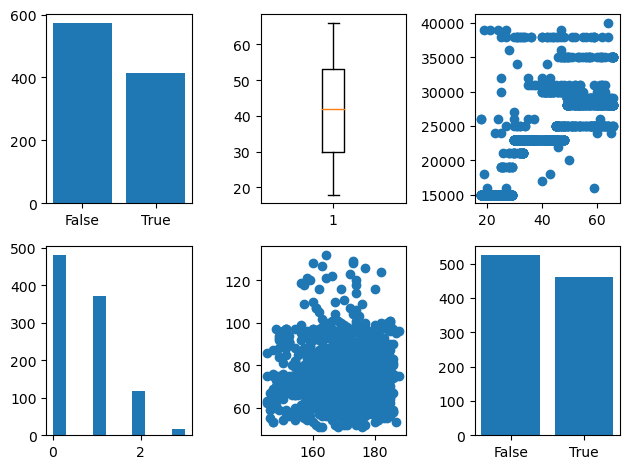

In [22]:
fig = plt.figure()
num_of_Diabetes = raw_data["Diabetes"].value_counts()
plt.subplot(2, 3, 1)
plt.bar(["False", "True"], num_of_Diabetes.values)
##
plt.subplot(2, 3, 2)
plt.boxplot(raw_data["Age"])

plt.subplot(2, 3, 3)
plt.scatter(x = "Age", y = "PremiumPrice", data = raw_data)

plt.subplot(2, 3, 4)
plt.hist(x = "NumberOfMajorSurgeries", data = raw_data)

plt.subplot(2, 3, 5)
plt.scatter(x = "Height", y = "Weight", data = raw_data)

num_of_Blood = raw_data["BloodPressureProblems"].value_counts()
plt.subplot(2, 3, 6)
plt.bar(["False", "True"], num_of_Blood.values)
plt.tight_layout()#分開圖表
plt.show()

## 使用 Subplots 建立子圖

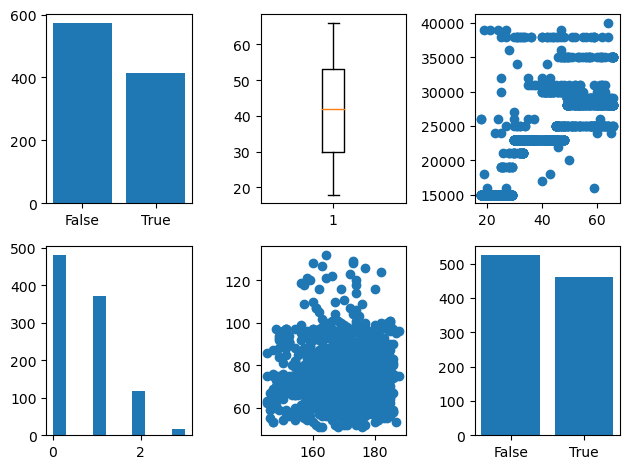

In [25]:
fig, ax = plt.subplots(nrows = 2, ncols = 3)

ax[0][0].bar(["False", "True"], num_of_Diabetes.values)

ax[0][1].boxplot(raw_data["Age"])

ax[0][2].scatter(x = "Age", y = "PremiumPrice", data = raw_data)

ax[1][0].hist(x = "NumberOfMajorSurgeries", data = raw_data)

ax[1][1].scatter(x = "Height", y = "Weight", data = raw_data)

ax[1][2].bar(["False", "True"], num_of_Blood.values)
plt.tight_layout()
plt.show()


## 使用 add_subplot 建立子圖

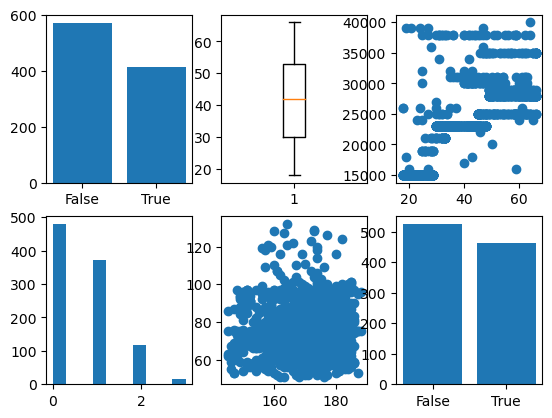

In [27]:
fig = plt.figure()

fig.add_subplot(231)
plt.bar(["False", "True"], num_of_Diabetes.values)

fig.add_subplot(232)
plt.boxplot(raw_data["Age"])

fig.add_subplot(233)
plt.scatter(x = "Age", y = "PremiumPrice", data = raw_data)

fig.add_subplot(234)
plt.hist(x = "NumberOfMajorSurgeries", data = raw_data)

fig.add_subplot(235)
plt.scatter(x = "Height", y = "Weight", data = raw_data)

fig.add_subplot(236)
plt.bar(["False", "True"], num_of_Blood.values)
plt.show()

## 使用 GridSpec 建置不規則排列

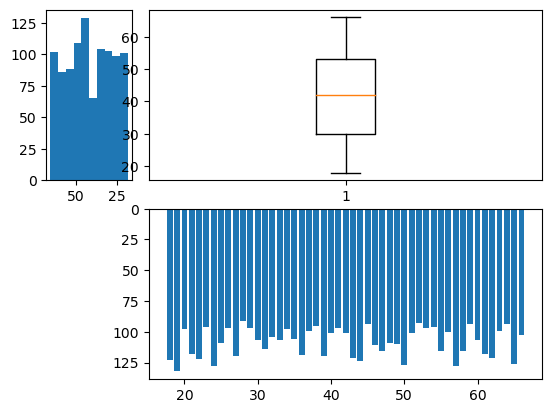

In [45]:
fig = plt.figure()
grid = plt.GridSpec(4, 5, wspace = 0.2, hspace = 0.4)

main_scatter = plt.subplot(grid[:-2, 0]) # 決定散佈圖會包含哪些子圖
main_scatter.hist(x = "Age",data = raw_data)
main_scatter.invert_xaxis() # 將直方圖結果由左邊翻轉至右邊

y_hist = plt.subplot(grid[:-2, 1:])
y_hist.boxplot(x = "Age", data = raw_data)

x_hist = plt.subplot(grid[2:, 1:])
x_hist.bar(x = "Age", height = 'Weight' ,data = raw_data)
x_hist.invert_yaxis() # 將直方圖結果由下方翻轉至上方

plt.show()